In [193]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt

orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')

In [194]:
# removing the $ sign and , from our profit and sales columns
orders['Sales'] = orders['Sales'].str.replace('$','')
orders['Sales'] = orders['Sales'].str.replace(',','').astype(float)
orders['Profit'] = orders['Profit'].str.replace('$','')
orders['Profit'] = orders['Profit'].str.replace(',','').astype(float)

In [195]:
# Getting the month from our Order.Date Column using regex 
from datetime import datetime
orders['Order.Date']= [datetime.strptime(i,'%m/%d/%y') for i in orders['Order.Date']]

In [196]:
# create month column
list = []
for i in orders['Order.Date']:
   list.append(i.month)
orders['Order.Month'] = list
orders['y']

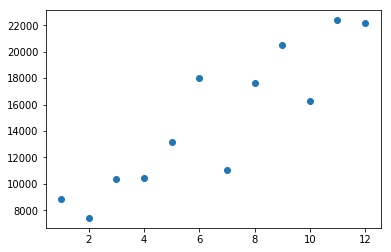

In [197]:
# Looking for seasonal trends

countMonth = orders.groupby(orders['Order.Month']).sum()
plt.scatter(y = countMonth['Quantity'], x= countMonth.index)

In [198]:
# Grouping by month and category to find the sum of inventory per each month
countCat = orders. groupby(['Order.Month','Category']).sum()
countCat = countCat.reset_index()

In [199]:
#Filtering each category so we can plot

filterTech = countCat[countCat['Category']=='Technology']
filterOffice = countCat[countCat['Category']=='Office Supplies']
filterFurn = countCat[countCat['Category']=='Furniture']

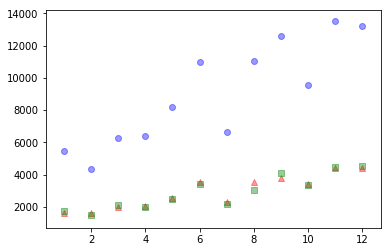

In [200]:
#Plotting our filters to see if there are trends
fig, ax = plt.subplots()
ax.scatter(x = filterTech['Order.Month'], y = filterTech['Quantity'] , color='r', marker='^', alpha=.4)
ax.scatter(x = filterOffice['Order.Month'], y = filterOffice['Quantity'], color='b', alpha=.4)
ax.scatter(x = filterFurn['Order.Month'], y = filterFurn['Quantity'], color='g', marker='s', alpha=.4)


In [217]:
orderRet_inner = orders.merge(returns, how = 'inner', left_on = 'Order.ID', right_on = 'Order ID')
orderRet_left = orders.merge(returns, how = 'left', left_on = 'Order.ID', right_on = 'Order ID')

In [218]:
orderRet_inner.groupby()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order ID,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.16,2,0.00,720.36,725.570,Critical,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.50,5,0.00,153.75,627.270,Critical,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1356.03,3,0.00,311.85,458.970,Critical,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,882.15,5,0.00,114.60,203.920,Critical,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,148.32,3,0.00,68.22,25.480,Critical,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
5,30194,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,45.45,3,0.00,14.04,17.730,Critical,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
6,30188,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,95.04,2,0.00,13.26,12.590,Critical,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
7,30192,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,23.70,2,0.00,9.48,5.090,Critical,12,Yes,IN-2012-PB19210127-41259,Eastern Asia
8,25438,IN-2015-JH158207-42140,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,2863.35,5,0.10,858.90,581.880,Critical,5,Yes,IN-2015-JH158207-42140,Oceania
9,25441,IN-2015-JH158207-42140,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,201.96,2,0.10,71.76,55.870,Critical,5,Yes,IN-2015-JH158207-42140,Oceania
